<a href="https://colab.research.google.com/github/upadhyeparag44/Task-3-EDA-on-SampleSuperstore/blob/main/Task_3_EDA_on_SampleSuperstore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**The Sparks Foundation**
##**Task 3:‘Exploratory Data Analysis’ on SampleSuperstore**

**As a business manager, try to find out the weak areas where you can
work to make more profit.**
##**Author : Parag Upadhye**

###**Start with Importing the libraries**

In [203]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


##**Now read the datasets**

In [204]:
from google.colab import files
uploaded = files.upload()

Saving SampleSuperstore.csv to SampleSuperstore (3).csv


In [205]:
import io
df = pd.read_csv(io.BytesIO(uploaded['SampleSuperstore.csv']))
df.head(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


###**Analysing a dataset**

In [206]:
df.shape

(9994, 13)

In [207]:
df.describe

<bound method NDFrame.describe of            Ship Mode    Segment        Country  ... Quantity Discount    Profit
0       Second Class   Consumer  United States  ...        2     0.00   41.9136
1       Second Class   Consumer  United States  ...        3     0.00  219.5820
2       Second Class  Corporate  United States  ...        2     0.00    6.8714
3     Standard Class   Consumer  United States  ...        5     0.45 -383.0310
4     Standard Class   Consumer  United States  ...        2     0.20    2.5164
...              ...        ...            ...  ...      ...      ...       ...
9989    Second Class   Consumer  United States  ...        3     0.20    4.1028
9990  Standard Class   Consumer  United States  ...        2     0.00   15.6332
9991  Standard Class   Consumer  United States  ...        2     0.20   19.3932
9992  Standard Class   Consumer  United States  ...        4     0.00   13.3200
9993    Second Class   Consumer  United States  ...        2     0.00   72.9480

[9994

In [208]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [209]:
df.nunique().head(10)

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
dtype: int64

###**Checking for the null values in the dataset**

In [210]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [211]:
df.isnull().head(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False


**There is no null value present in the Dataset**

###**Corelation Matrix analysis**

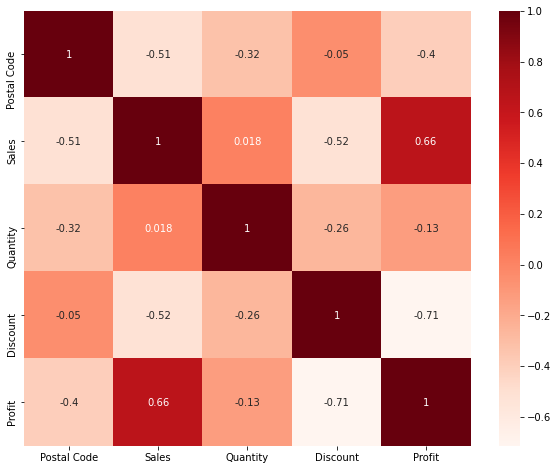

In [212]:
corelation=df.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corelation.corr(), annot=True, cmap = 'Reds')

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

###**Numeric - Categorical Analysis**

**First check for mean value using groupby**

In [213]:
df.groupby('Category')['Sales'].mean().head(10)

Category
Furniture          349.834887
Office Supplies    119.324101
Technology         452.709276
Name: Sales, dtype: float64

In [214]:
df.groupby('Category')['Sales'].median().head(10)

Category
Furniture          182.220
Office Supplies     27.418
Technology         166.160
Name: Sales, dtype: float64

In [215]:
df.groupby(['Category','Sub-Category'])['Quantity'].count().head(10)

Category         Sub-Category
Furniture        Bookcases        228
                 Chairs           617
                 Furnishings      957
                 Tables           319
Office Supplies  Appliances       466
                 Art              796
                 Binders         1523
                 Envelopes        254
                 Fasteners        217
                 Labels           364
Name: Quantity, dtype: int64

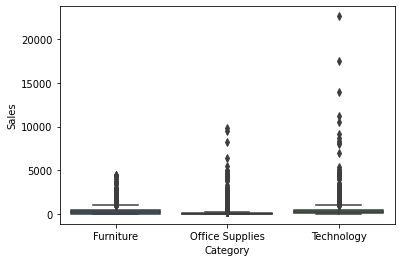

In [216]:
sns.boxplot(x=df.Category, y=df.Sales)
plt.show()

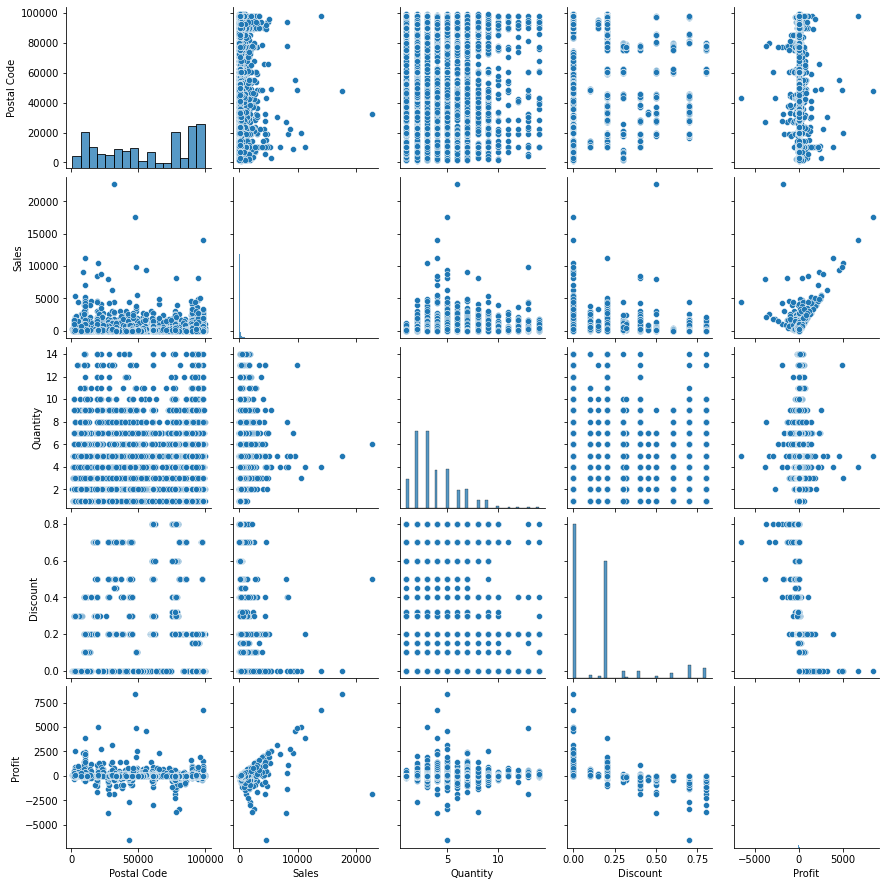

In [217]:
sns.pairplot(df)

###**If we analyze data by taking two variables/columns into consideration from a dataset**

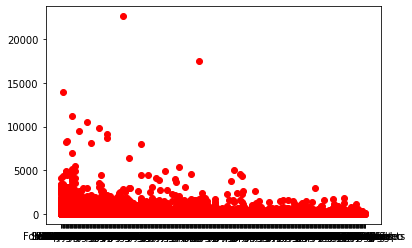

In [218]:
plt.scatter(df.City,df.Sales,color='red')
plt.show()

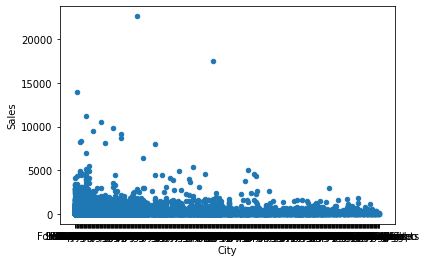

In [219]:
df.plot.scatter(x="City",y="Sales")
plt.show()

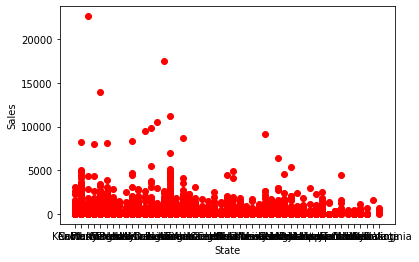

In [220]:
df.plot.scatter(x="State",y="Sales")
plt.scatter(df.State,df.Sales,color='red')

plt.show()

###**Analysis on the basis of individual column of dataset**

**For Ship Mode column**

Standard Class    0.597158
Second Class      0.194617
First Class       0.153892
Same Day          0.054333
Name: Ship Mode, dtype: float64


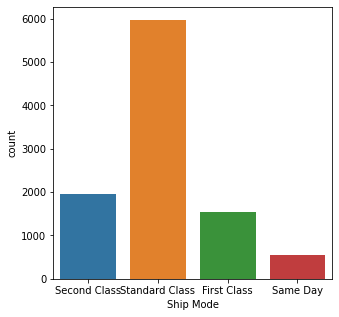

In [221]:
plt.figure(figsize=(5,5))
sns.countplot(x=df['Ship Mode'])
print(df['Ship Mode'].value_counts(10))

**for Segment column**

Consumer       0.519412
Corporate      0.302181
Home Office    0.178407
Name: Segment, dtype: float64


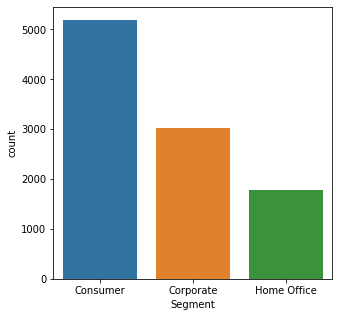

In [222]:
plt.figure(figsize=(5,5))
sns.countplot(x=df['Segment'])
print(df['Segment'].value_counts(10))

**Now For Country column** 

United States    1.0
Name: Country, dtype: float64


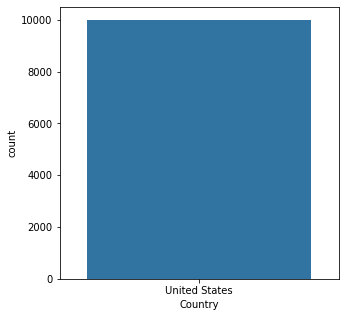

In [223]:
plt.figure(figsize=(5,5))
sns.countplot(x=df['Country'])
print(df['Country'].value_counts(10))

**Now For City column** 

New York City    0.091555
Los Angeles      0.074745
Philadelphia     0.053732
San Francisco    0.051031
Seattle          0.042826
                   ...   
Goldsboro        0.000100
Manhattan        0.000100
Ontario          0.000100
Missoula         0.000100
Tinley Park      0.000100
Name: City, Length: 531, dtype: float64


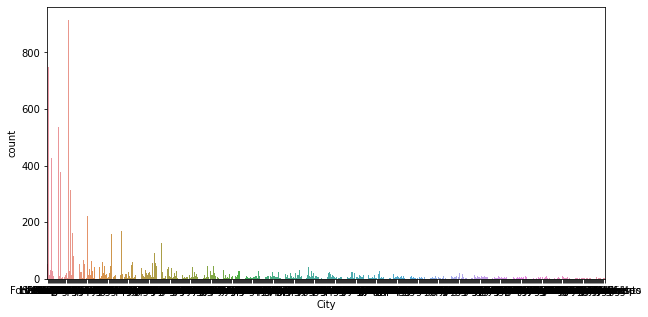

In [224]:
plt.figure(figsize=(10,5))
sns.countplot(x=df['City'])
print(df['City'].value_counts(10))

**Now For State column** 

California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Virginia                 224
Arizona                  224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   124
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Missouri                  66
Oklahoma                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Mississippi               53
Utah                      53
Louisiana                 42
South Carolina            42
Nevada        

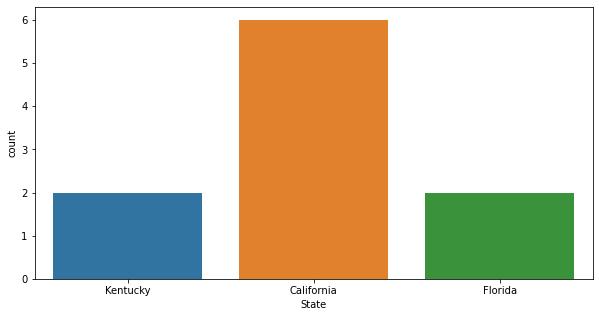

In [225]:
plt.figure(figsize=(10,5))
sns.countplot(x=df['State'].head(10))
print(df['State'].value_counts())

**Now For Postal Code column** 

10035    0.026316
10024    0.023014
10009    0.022914
94122    0.020312
10011    0.019312
           ...   
33458    0.000100
95616    0.000100
48307    0.000100
61832    0.000100
59102    0.000100
Name: Postal Code, Length: 631, dtype: float64


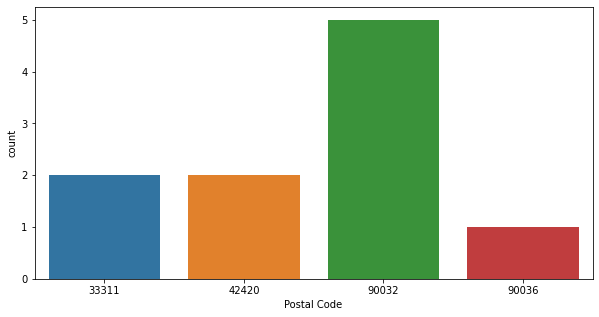

In [226]:
plt.figure(figsize=(10,5))
sns.countplot(x=df['Postal Code'].head(10))
print(df['Postal Code'].value_counts(10))

**Now For Region column** 

West       0.320492
East       0.284971
Central    0.232439
South      0.162097
Name: Region, dtype: float64


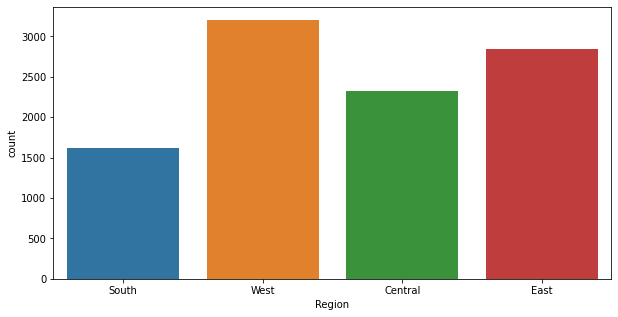

In [227]:
plt.figure(figsize=(10,5))
sns.countplot(x=df['Region'])
print(df['Region'].value_counts(10))

**Now For Category column** 

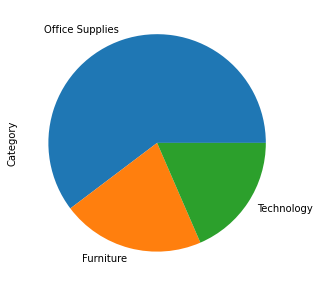

In [228]:
plt.figure(figsize=(10,5))
df['Category'].value_counts().plot.pie()
plt.show()

**Now For Sub-Category column** 

<BarContainer object of 9994 artists>

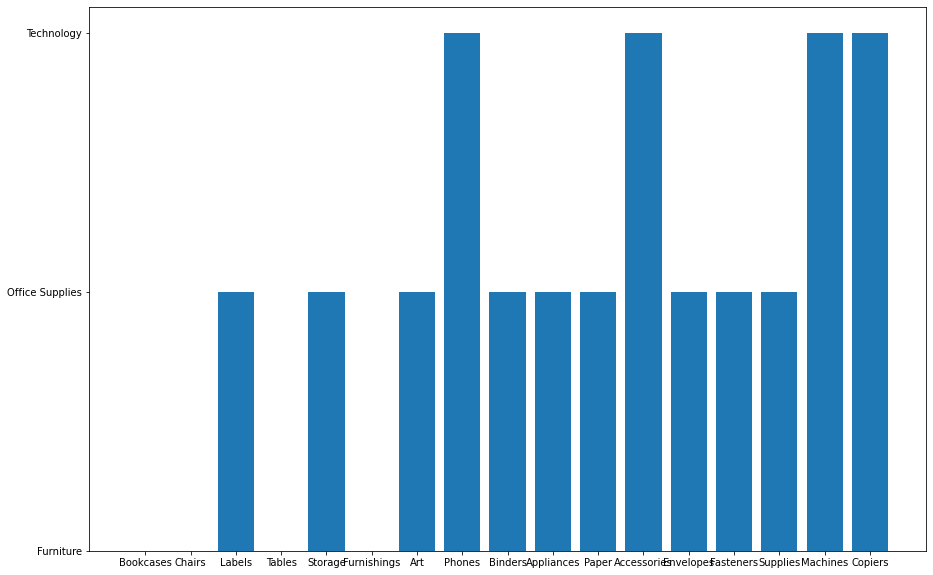

In [229]:
plt.figure(figsize=(15,10))
plt.bar('Sub-Category','Category',data=df)

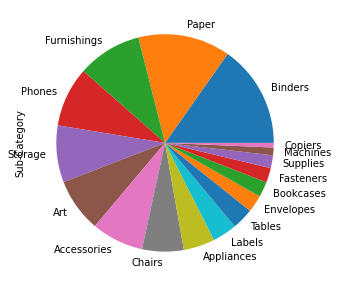

In [230]:
plt.figure(figsize=(10,5))
df['Sub-Category'].value_counts().plot.pie()
plt.show()

**Now For Sales column** 

12.960     56
19.440     39
15.552     39
25.920     36
10.368     36
           ..
376.866     1
572.800     1
3.928       1
12.032      1
629.640     1
Name: Sales, Length: 5825, dtype: int64


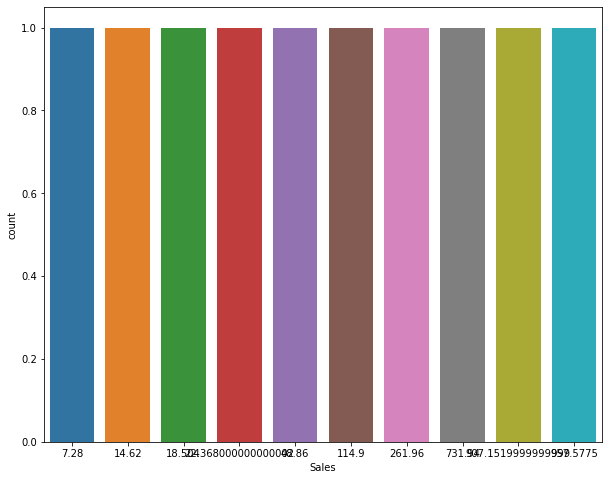

In [238]:
plt.figure(figsize=(10,8))
sns.countplot(x=df['Sales'].head(10))
print(df['Sales'].value_counts())

**Now For Quantity column** 

3     2409
2     2402
5     1230
4     1191
1      899
7      606
6      572
9      258
8      257
10      57
11      34
14      29
13      27
12      23
Name: Quantity, dtype: int64


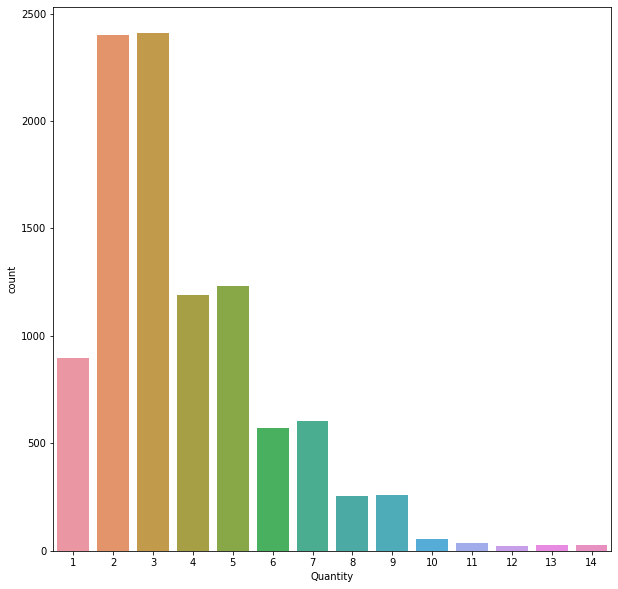

In [232]:
plt.figure(figsize=(10,10))
sns.countplot(x=df['Quantity'])
print(df['Quantity'].value_counts())

**Now For Discount column** 

0.00    4798
0.20    3657
0.70     418
0.80     300
0.30     227
0.40     206
0.60     138
0.10      94
0.50      66
0.15      52
0.32      27
0.45      11
Name: Discount, dtype: int64


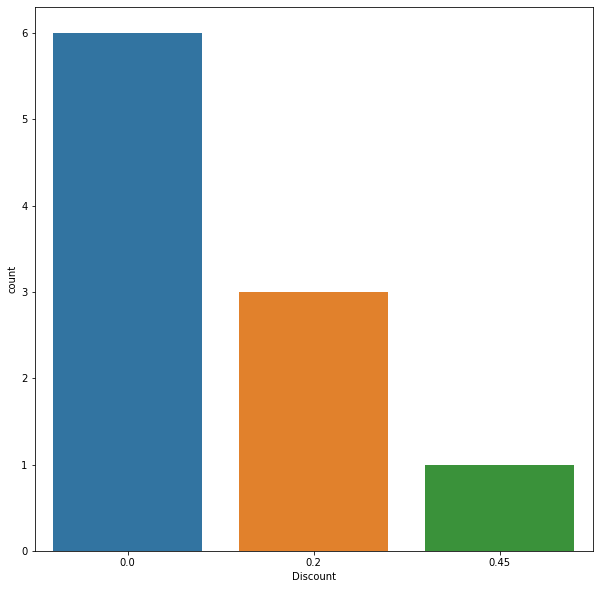

In [233]:
plt.figure(figsize=(10,10))
sns.countplot(x=df['Discount'].head(10))
print(df['Discount'].value_counts())

**Now For Profit column** 

 0.0000      65
 6.2208      43
 9.3312      38
 5.4432      32
 3.6288      32
             ..
-3.5622       1
-7.4800       1
 626.1850     1
-12.8392      1
 6.1704       1
Name: Profit, Length: 7287, dtype: int64


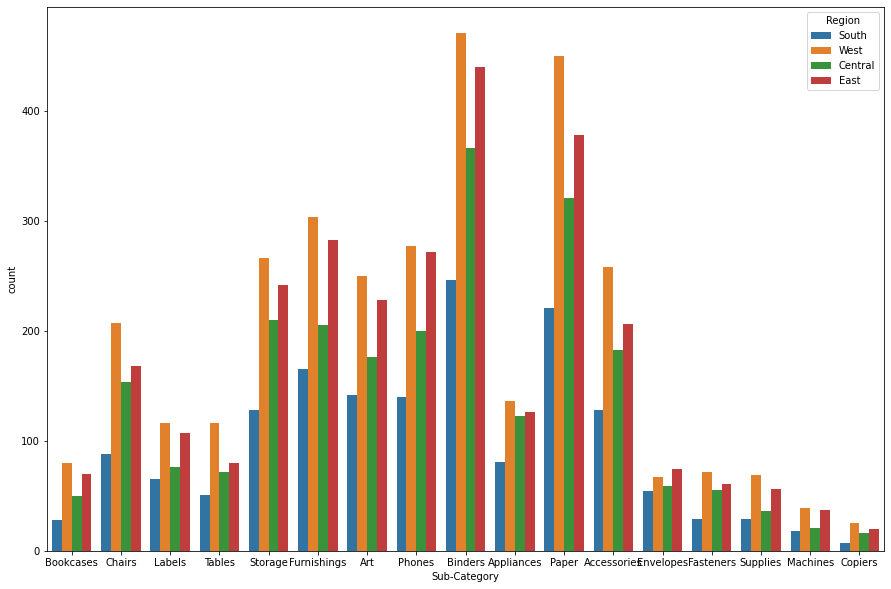

In [234]:
plt.figure(figsize=(15,10))
sns.countplot(x='Sub-Category',hue='Region',data=df)
print(df['Profit'].value_counts())

##**Interpretation of the Dataset**
**The Dataset is of *Superstore's sales*. Its shape is (9994, 13).It describes [9994 rows x 13 columns] present in it.Dataset is having *no null value* present in it.In ship mode the *standard class* rank the data,In the Segment part the *consumer* takes the highest value. For the country *United States* all over.In the City sector *New York City* ranked with 0.091555.In the *California state* the sales high as 0.200220.According to the *postal code* '10035'is having the highest value of 0.026316.The *West region* is having the highest sales of the shop as 0.320492.According to the category the *office supplies* items were sold at the highest rate.*Sales rate* is max at 12.960-56 .*Quantity wise* the 3 items is having maximum demand.The discount offered to the max person is 0.00 specifically.The profit percentage is maximum for the *Binders*.For making more profit we have to focus on Wyoming state.**